In [179]:
# 모듈 불러오기
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.proportion import proportions_ztest

In [288]:
# 데이터 불러오기
df1 = pd.read_csv("data/Chicago_Crimes_2001_to_2004.csv", on_bad_lines='skip', low_memory=False)
df2 = pd.read_csv("data/Chicago_Crimes_2005_to_2007.csv", on_bad_lines='skip', low_memory=False)
df3 = pd.read_csv("data/Chicago_Crimes_2008_to_2011.csv", on_bad_lines='skip', low_memory=False)
df4 = pd.read_csv("data/Chicago_Crimes_2012_to_2017.csv", on_bad_lines='skip', low_memory=False)

In [289]:
# 데이터 행의 크기 계산
a = df1.shape[0]
b = df2.shape[0]
c = df3.shape[0]
d = df4.shape[0]

a+b+c+d

7941282

In [290]:
df1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,"(41.691784636, -87.635115968)"


In [291]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923515 entries, 0 to 1923514
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [292]:
# 데이터의 결측치 계산
a = df1.isnull().sum()
b = df2.isnull().sum()
c = df3.isnull().sum()
d = df4.isnull().sum()

a+b+c+d

Unnamed: 0                   0
ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

## 문제정의 및 가설설정

🔍체포율과 범죄 유형 가설

📌가설 1. 폭력범죄의 경우, 재산범죄보다 체포율이 높을것이다.  
폭력범죄는 피해자가 직접 신고하는 경우가 많고, 경찰이 즉각 대응하지만  
재산 범죄는 피해자가 사건 발생 후 한참 뒤에 인지하는 경우가 많고, 증거 확보가 어려워 체포율이 낮을수 있음.

📌가설 2. 마약/도박 관련 범죄는 도심지에서 자주 발생하며 체포율이 높을 것이다.  
마약 범죄는 경찰이 직접 단속하는 경우가 많아 체포로 이어질 확률이 높음.  
경찰이 함정 수사를 하거나, 수색 과정에서 마약 소지자가 적발되는 경우가 많음.

📌가설 3. 성범죄의 체포율이 낮을 것이다.  
성범죄는 피해자가 신고를 꺼리는 경우가 많음.  
가해자가 특정되지 않거나 증거 확보가 어려운 경우가 많아 체포로 이어지기 어려움.

📌가설4. 가정폭력 사건의 체포율이 높을 것이다.  
가정폭력 사건은 신고 시 경찰이 즉시 출동하는 경우가 많고, 가해자가 현장에서 체포될 가능성이 높음.  
일리노이 가정폭력법에 따라, 경찰은 가정폭력 신고가 접수되면 강제적으로 조치를 취해야 하는 경우가 많음.

### 전처리

In [295]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [296]:
# subset=df.columns.tolist() 조건을 통해 엄격하게 판단하기 -> 1,740,623 * 2의 중복 데이터 쌍 확인 
df[df.duplicated(subset=df.columns.tolist(), keep=False)]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092440,2023512,7818227,HS625704,11/21/2010 01:00:00 AM,011XX W 63RD ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,...,16.0,68.0,04B,1169886.0,1863025.0,2010.0,02/04/2016 06:33:39 AM,41.779637,-87.652723,"(41.779636911, -87.652722856)"
6092441,2023513,7818228,HS628791,11/22/2010 01:30:00 PM,013XX N MONTICELLO AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,26.0,23.0,08A,1151793.0,1908598.0,2010.0,02/04/2016 06:33:39 AM,41.905069,-87.717857,"(41.905068764, -87.717857318)"
6092442,2023514,7818230,HS626931,11/22/2010 03:10:00 AM,080XX S CHAPPEL AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,...,8.0,46.0,07,1191262.0,1851970.0,2010.0,02/04/2016 06:33:39 AM,41.74881,-87.574714,"(41.748810103, -87.574714227)"
6092443,2023515,7818231,HS626957,11/22/2010 04:57:00 AM,065XX S EVANS AVE,0460,BATTERY,SIMPLE,APARTMENT,False,...,20.0,42.0,08B,1182345.0,1861756.0,2010.0,02/04/2016 06:33:39 AM,41.775875,-87.607086,"(41.775874974, -87.607086254)"


In [297]:
# 중복 없이 유일한 행만 남기기
df = df.drop_duplicates()

In [298]:
df.shape

(6170813, 23)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6170813 entries, 0 to 7941281
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   ID                    int64         
 2   Case Number           object        
 3   Date                  datetime64[ns]
 4   Block                 object        
 5   IUCR                  object        
 6   Primary Type          object        
 7   Description           object        
 8   Location Description  object        
 9   Arrest                bool          
 10  Domestic              bool          
 11  Beat                  int64         
 12  District              float64       
 13  Ward                  float64       
 14  Community Area        float64       
 15  FBI Code              object        
 16  X Coordinate          float64       
 17  Y Coordinate          float64       
 18  Year                  Int64         
 19  Updat

In [312]:
df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1968
Arrest                       0
Domestic                     0
Beat                         0
District                    49
Ward                    614865
Community Area          616042
FBI Code                     0
X Coordinate             84223
Y Coordinate             84224
Year                         0
Updated On                   1
Latitude                 84224
Longitude                84224
Location                 84224
dtype: int64

### Beat, Ward, Community Area 관계

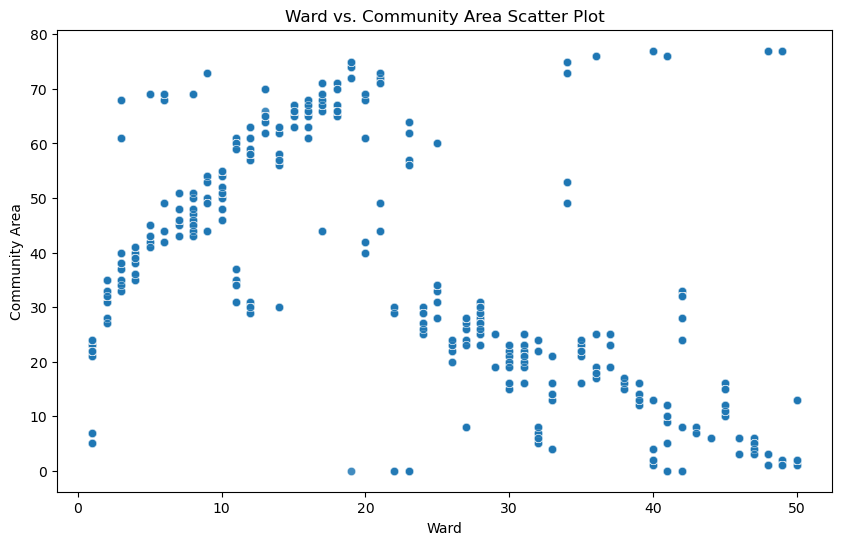

In [355]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ward', y='Community Area', data=df, alpha=0.6)

# 제목 및 축 레이블 추가
plt.title('Ward vs. Community Area Scatter Plot')
plt.xlabel('Ward')
plt.ylabel('Community Area')

# 산점도 출력
plt.show()

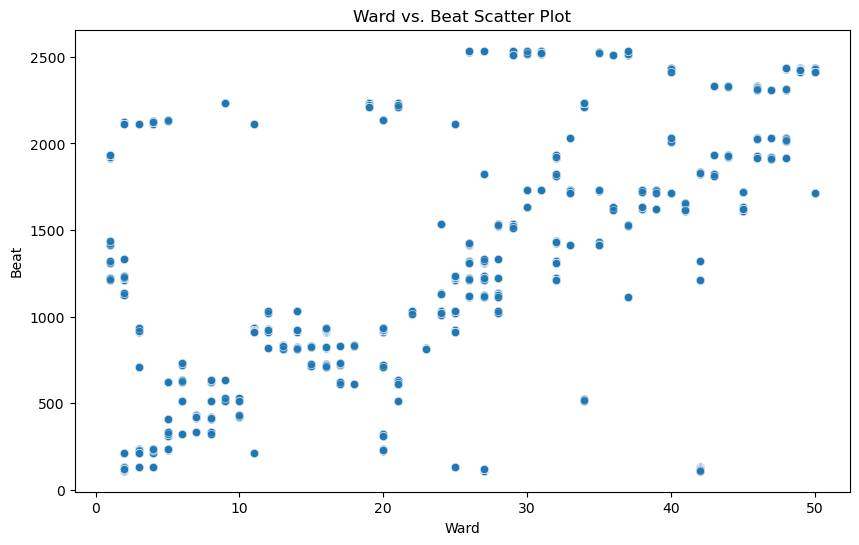

In [357]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ward', y='Beat', data=df, alpha=0.6)

# 제목 및 축 레이블 추가
plt.title('Ward vs. Beat Scatter Plot')
plt.xlabel('Ward')
plt.ylabel('Beat')

# 산점도 출력
plt.show()

### 시각화를 위한 전처리가 끝난 데이터

In [245]:
df = pd.read_csv("data/data_visualization.csv")

In [247]:
# 데이터 형태 변환
# 1. 날짜형으로 변환 (object → datetime)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')

# 2. 숫자형으로 변환 (object → float)
df['Y Coordinate'] = pd.to_numeric(df['Y Coordinate'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

# 3. 소수 없는 연도 → 정수형으로 변환 (float → int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') # 숫자로 변환 + NaN 처리 (if needed)
df['Year'] = df['Year'].round().astype('Int64') # 반올림 후 Int64로 변환 (결측치는 유지)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6086586 entries, 0 to 6086585
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   ID                    int64         
 2   Case Number           object        
 3   Date                  datetime64[ns]
 4   Block                 object        
 5   IUCR                  object        
 6   Primary Type          object        
 7   Description           object        
 8   Location Description  object        
 9   Arrest                bool          
 10  Domestic              bool          
 11  Beat                  int64         
 12  District              float64       
 13  Ward                  float64       
 14  Community Area        float64       
 15  FBI Code              object        
 16  X Coordinate          float64       
 17  Y Coordinate          float64       
 18  Year                  Int64         
 19  

In [28]:
df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    605612
Community Area          606676
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

In [325]:
df['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [175]:
# 범죄 유형 정리
# 재산범죄
property_crime = ['THEFT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS']
# 폭력범죄
violent_crime = ['ASSAULT', 'BATTERY', 'HOMICIDE', 'KIDNAPPING', 'STALKING', 'INTIMIDATION', 'DOMESTIC VIOLENCE']
# 성범죄
sex_crime = ['CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'PUBLIC INDECENCY', 'OBSCENITY']
# 마약/도박
drug_gambling_crime = ['NARCOTICS', 'OTHER NARCOTIC VIOLATION', 'GAMBLING', 'LIQUOR LAW VIOLATION']
# 공공질서 위반
public_order_crime = ['PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER']
# 기타 범죄
other_crime = ['OTHER OFFENSE', 'DECEPTIVE PRACTICE', 'RITUALISM', 'NON-CRIMINAL']

def categorized_crime(crime_type):
    if crime_type in property_crime:
        return 'Property Crime'
    elif crime_type in violent_crime:
        return 'Violent Crime'
    elif crime_type in sex_crime:
        return 'Sex Crime'
    elif crime_type in drug_gambling_crime:
        return 'Drug/Gambling'
    elif crime_type in public_order_crime:
        return 'Public Order'
    else:
        return 'Other'

df['Crime Category'] = df['Primary Type'].apply(categorized_crime)

### EDA

#### 📌가설 1. 폭력범죄의 경우, 재산범죄보다 체포율이 높을것이다.

In [189]:
# 각 범죄 유형별 체포율 계산
violent_crime_arrest_rate = df[df['Primary Type'].isin(violent_crime)]['Arrest'].mean()
property_crime_arrest_rate = df[df['Primary Type'].isin(property_crime)]['Arrest'].mean()

# 결과 출력
print(f"폭력 범죄 체포율: {violent_crime_arrest_rate:.2%}")
print(f"재산 범죄 체포율: {property_crime_arrest_rate:.2%}")

폭력 범죄 체포율: 23.26%
재산 범죄 체포율: 13.41%


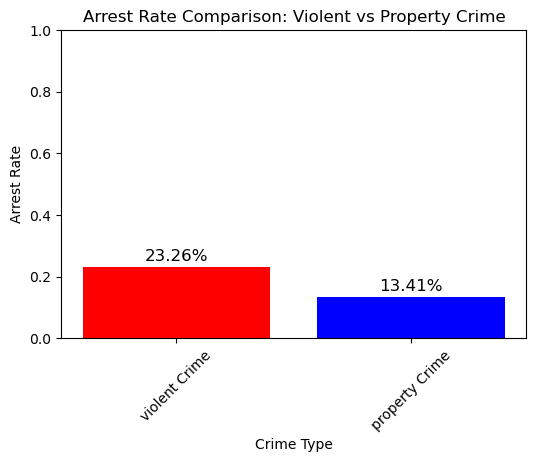

In [191]:
# 범죄 유형 및 체포율 리스트
crime_types = ['violent Crime', 'property Crime']
arrest_rates = [violent_crime_arrest_rate, property_crime_arrest_rate]

# 막대 그래프 그리기
plt.figure(figsize=(6,4))
plt.bar(crime_types, arrest_rates, color=['red', 'blue'])

# 그래프 꾸미기
plt.xlabel("Crime Type")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate Comparison: Violent vs Property Crime")
plt.ylim(0, 1)  # 체포율 범위 (0~1)
plt.xticks(rotation=45)

# 값 표시
for i, rate in enumerate(arrest_rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12)

# 그래프 출력
plt.show()

- 폭력범죄는 재산범죄보다 체포율이 높다

#### 📌가설 2. 마약/도박 관련 범죄는 주거지에서 자주 발생할것이다.

In [337]:
df['Location Description'].unique()

array(['RESIDENCE', 'OTHER', 'APARTMENT', 'RESIDENCE PORCH/HALLWAY',
       'GAS STATION', 'COMMERCIAL / BUSINESS OFFICE', 'STREET', 'BANK',
       'SMALL RETAIL STORE', 'DEPARTMENT STORE', 'SIDEWALK',
       'APPLIANCE STORE', 'HOTEL/MOTEL', 'MEDICAL/DENTAL OFFICE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'DAY CARE CENTER',
       'RESTAURANT', 'COLLEGE/UNIVERSITY GROUNDS',
       'SCHOOL, PUBLIC, BUILDING', 'HOSPITAL BUILDING/GROUNDS',
       'WAREHOUSE', 'FACTORY/MANUFACTURING BUILDING',
       'SCHOOL, PRIVATE, GROUNDS', 'GROCERY FOOD STORE', 'CHA APARTMENT',
       'SCHOOL, PUBLIC, GROUNDS', 'VEHICLE NON-COMMERCIAL',
       'GOVERNMENT BUILDING/PROPERTY', 'AIRPORT/AIRCRAFT',
       'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
       'POLICE FACILITY/VEH PARKING LOT', 'TAVERN/LIQUOR STORE',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE-GARAGE',
       'PARK PROPERTY', 'CHA PARKING LOT/GROUNDS', 'ABANDONED BUILDING'

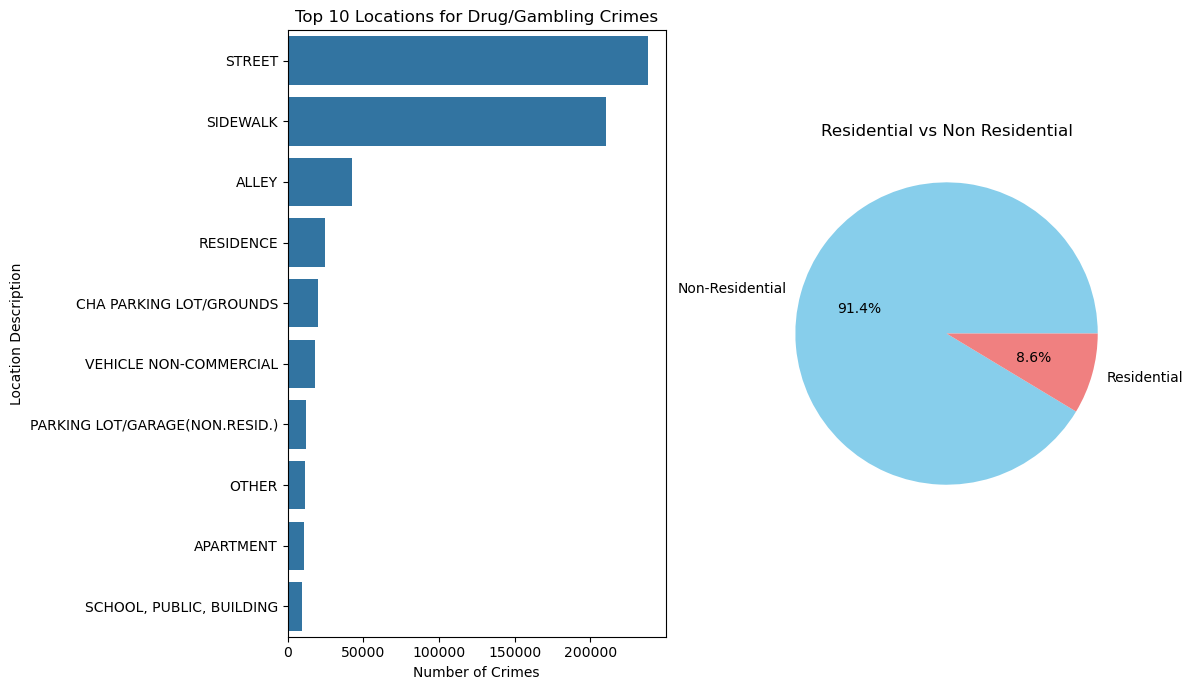

Chi-Square Statistic: 0.11
P-value: 0.7360
마약/도박 범죄 발생 장소는 랜덤하게 분포함 (귀무가설 채택)


In [251]:
# 주거지 관련 장소 리스트
residential_locations = [
    'RESIDENCE', 'APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'CHA APARTMENT', 
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE-GARAGE', 'RESIDENTIAL YARD (FRONT/BACK)', 
    'HOUSE', 'COACH HOUSE', 'PORCH', 'YARD', 'ROOMING HOUSE', 'NURSING HOME/RETIREMENT HOME']

# 주거지/비주거지 여부 컬럼 추가 (SettingWithCopyWarning 방지)
df_drug_gambling = df[df['Primary Type'].isin(['NARCOTICS', 'OTHER NARCOTIC VIOLATION'])].copy()

df_drug_gambling.loc[:, 'is_residential'] = df_drug_gambling['Location Description'].apply(
    lambda x: 'Residential' if x in residential_locations else 'Non-Residential'
)

# 주거지 vs 비주거지 범죄 발생 비율
location_counts = df_drug_gambling['is_residential'].value_counts()

# 시각화
plt.figure(figsize=(12, 7))

# 장소별 범죄 발생 건수 (막대 그래프)
plt.subplot(1, 2, 1)
sns.countplot(y=df_drug_gambling['Location Description'], order=df_drug_gambling['Location Description'].value_counts().index[:10])
plt.title("Top 10 Locations for Drug/Gambling Crimes")
plt.xlabel("Number of Crimes")
plt.ylabel("Location Description")

# 주거지 vs 비주거지 비율 (파이 차트)
plt.subplot(1, 2, 2)
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Residential vs Non Residential")

plt.tight_layout()
plt.show()

# 카이제곱 검정
# 관측된 데이터 (Contingency Table)
contingency_table = pd.crosstab(df_drug_gambling['is_residential'], df_drug_gambling['Primary Type'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

# 걀과 해석
if p < 0.05:
    print("마약/도박 범죄는 특정 장소에서 더 자주 발생함 (귀무가설 기각)")
else:
    print("마약/도박 범죄 발생 장소는 랜덤하게 분포함 (귀무가설 채택)")


- 두 개의 범주형 변수간의 독립성을 검정하기 위해 카이제곱 검정을 사용
- 귀무가설(H₀): 주거지 여부와 마약/도박 범죄 발생 빈도는 관계가 없다.
- 대립가설(H₁): 주거지에서 마약/도박 범죄가 더 자주 발생한다.
- 검정 결과: p-value = 0.7360 (유의수준 0.05보다 큼) → 대립가설 기각 → 귀무가설 채택 → 주거지 여부와 마약/도박 범죄 발생 빈도는 관계가 없다.

#### 📌가설 3. 성범죄의 체포율이 낮을 것이다. ⚠️

In [344]:
# 각 범죄 유형별 체포율 계산
sex_crime_rate = df[df['Primary Type'].isin(sex_crime)]['Arrest'].mean()
drug_gambling_crime_rate = df[df['Primary Type'].isin(drug_gambling_crime)]['Arrest'].mean()
public_order_crime_rate = df[df['Primary Type'].isin(public_order_crime)]['Arrest'].mean()
other_crime_rate = df[df['Primary Type'].isin(other_crime)]['Arrest'].mean()

# 결과 출력
print(f"성범죄 체포율 : {sex_crime_rate:.2%}")
print(f"마약/도박 체포율 : {drug_gambling_crime_rate:.2%}")
print(f"공공장소 위반 체포율 : {public_order_crime_rate:.2%}")
print(f"기타 범죄 체포율 : {other_crime_rate:.2%}")

성범죄 체포율 : 24.74%
마약/도박 체포율 : 99.33%
공공장소 위반 체포율 : 70.30%
기타 범죄 체포율 : 18.00%


- 폭력범죄, 재산범죄, 기타범죄보다 체포율이 높고 마약/도박, 공공장소 위반 보다 체포율이 낮은 것을 알수있음.

#### 📌가설4. 가정폭력 사건의 체포율이 높을 것이다. ⚠️

In [348]:
# 가정폭력 사건만 필터링 (Domestic이 True인 사건)
df_domestic = df[df['Domestic'] == True]

# 가정폭력 사건 중 체포된 사건의 비율 계산
domestic_rate = df_domestic['Arrest'].mean()

# 결과 출력
print(f"가정폭력 사건의 체포율: {domestic_rate:.2%}")

가정폭력 사건의 체포율: 19.96%


- 폭력 범죄 체포율: 23.20%  
- 재산 범죄 체포율: 13.35  
- 성범죄 체포율 : 24.74%  
- 마약/도박 체포율 : 99.33%  
- 공공장소 위반 체포율 : 70.30%  
- 기타 범죄 체포율 : 18.00%
- 가정폭력 사건의 체포율: 19.96%

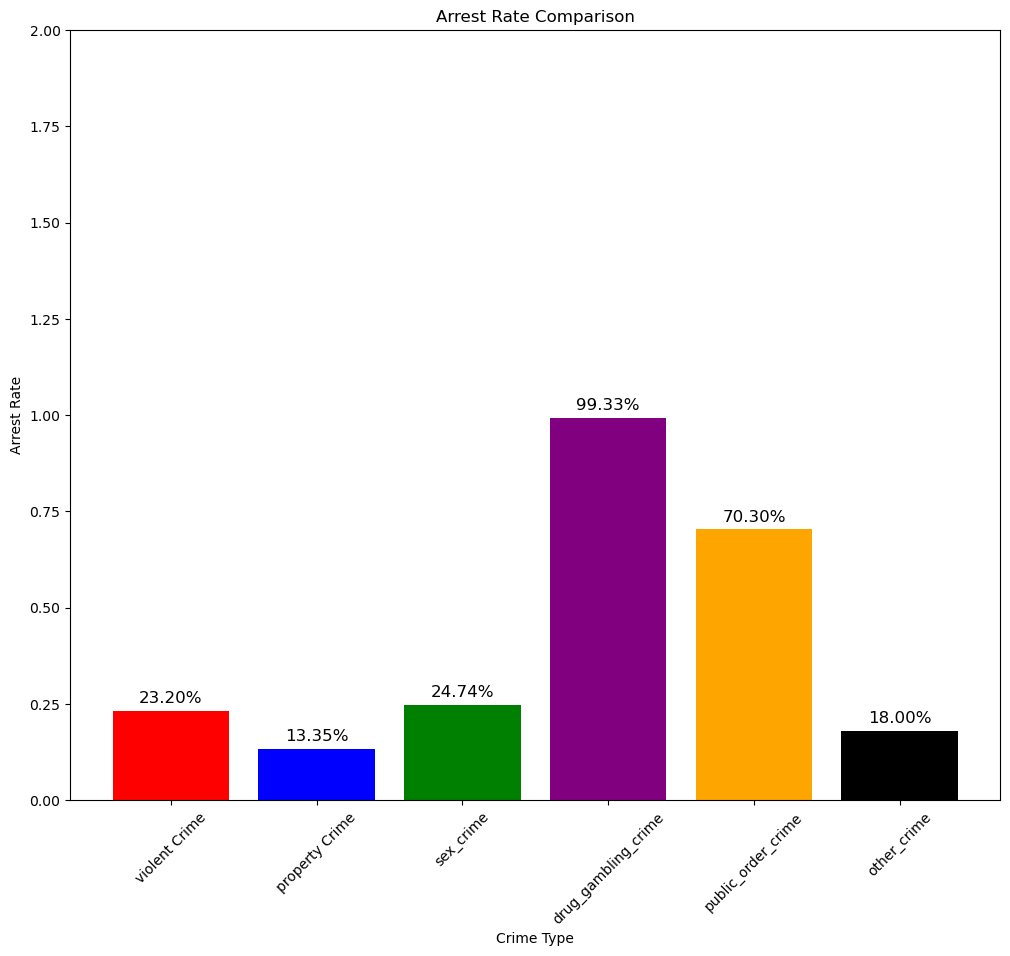

In [352]:
# 범죄 유형 및 체포율 리스트
crime_types = ['violent Crime', 'property Crime', 'sex_crime', 'drug_gambling_crime', 'public_order_crime', 'other_crime']
arrest_rates = [violent_crime_arrest_rate, property_crime_arrest_rate, sex_crime_rate, drug_gambling_crime_rate, 
                public_order_crime_rate, other_crime_rate]

# 막대 그래프 그리기
plt.figure(figsize=(12,10))
plt.bar(crime_types, arrest_rates, color=['red', 'blue', 'green', 'purple', 'orange', 'black'])

# 그래프 꾸미기
plt.xlabel("Crime Type")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate Comparison")
plt.ylim(0, 2)  # 체포율 범위 (0~1)
plt.xticks(rotation=45)

# 값 표시
for i, rate in enumerate(arrest_rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12)

# 그래프 출력
plt.show()

📌가설 1. 폭력범죄의 경우, 재산범죄보다 체포율이 높을것이다. → ✅ TURE

📌가설 2. 마약/도박 관련 범죄는 도심지에서 자주 발생하며 체포율이 높을 것이다. → 애매함. 도심지와 비도심지를 구분짓는 기준을 변경해야할거 같음.

📌가설 3. 성범죄의 체포율이 낮을 것이다. → 상위 3번째의 체포율을 보여 애매함.

📌가설4. 가정폭력 사건의 체포율이 높을 것이다. → 하위 3번째의 체포율을 보여 높은편은 아님.

#### 📌 가설 5. 절도 범죄는 출퇴근 시간에 벌어졌을 것이다.

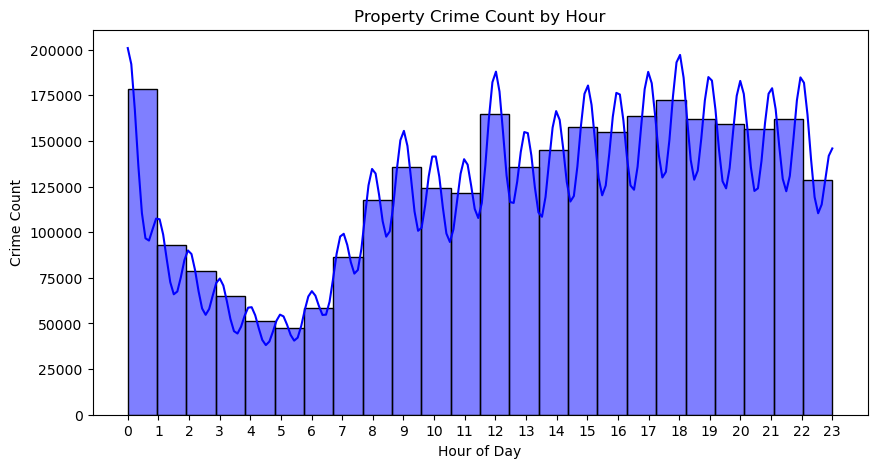

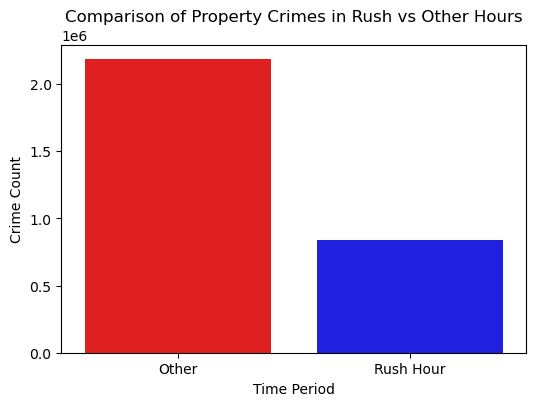


Chi-Square Test Results:
Chi-Square Statistic: 8859.02
p-value: 0.0000
출퇴근 시간과 기타 시간대의 범죄 발생 빈도 차이는 통계적으로 유의미함.


In [234]:
# 절도 관련 범죄 유형 정의
property_crime = ['THEFT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS']

# 범죄 유형 필터링
df = df[df['Primary Type'].isin(property_crime)]

# 발생 시간 변환
df['Hour'] = df['Date'].dt.hour  # 시간 추출

# 출퇴근 시간 정의 (예: 7~9시, 17~19시)
df['Time Period'] = df['Hour'].apply(lambda x: 'Rush Hour' if x in [7, 8, 9, 17, 18, 19] else 'Other')

# 시간대별 범죄 발생 건수 시각화
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=True, color='blue')
plt.xticks(range(24))
plt.xlabel('Hour of Day')
plt.ylabel('Crime Count')
plt.title('Property Crime Count by Hour')
plt.show()

# 출퇴근 시간 vs 기타 시간대 비교 (막대그래프)
plt.figure(figsize=(6, 4))
sns.countplot(x='Time Period', data=df, hue='Time Period', palette=['red', 'blue'])
plt.xlabel('Time Period')
plt.ylabel('Crime Count')
plt.title('Comparison of Property Crimes in Rush vs Other Hours')
plt.show()

# 카이제곱 검정을 위한 교차표 생성
contingency_table = pd.crosstab(df['Time Period'], df['Primary Type'])

# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"p-value: {p_val:.4f}")

# 유의수준 0.05 기준 해석
if p_val < 0.05:
    print("출퇴근 시간과 기타 시간대의 범죄 발생 빈도 차이는 통계적으로 유의미함.")
else:
    print("출퇴근 시간과 기타 시간대의 범죄 발생 빈도 차이는 유의미하지 않음.")

- 출퇴근 시간과 기타 시간대 데이터를 비교 (범주형 데이터)

- 출퇴근 시간과 기타 시간대의 범죄 발생 패턴이 다르다고 가정하고 두 범주형 변수간의 독립성을 비교하기 위해 카이제곱을 사용

- 귀무가설(H₀): 출퇴근 시간과 기타 시간대의 범죄 발생 패턴은 차이가 없다.

- 대립가설(H₁): 출퇴근 시간과 기타 시간대의 범죄 발생 패턴은 차이가 있다.

- 검정 결과: p-value = 0.0000 (유의수준 0.05보다 작음) → 귀무가설 기각 → 대립가설 채택  
→ 출퇴근 시간과 기타 시간대의 범죄 발생 패턴은 차이가 있다 → 출퇴근 시간과 기타 시간대에서 절도 범죄의 발생 비율이 다를 가능성이 높음.  
→ 하지만, 출퇴근 시간에 더 많다는 것을 보장하지 않음.

#### 📌 가설 6. 마약 관련 범죄는 요일에 상관 없이 일어났을 것이다.

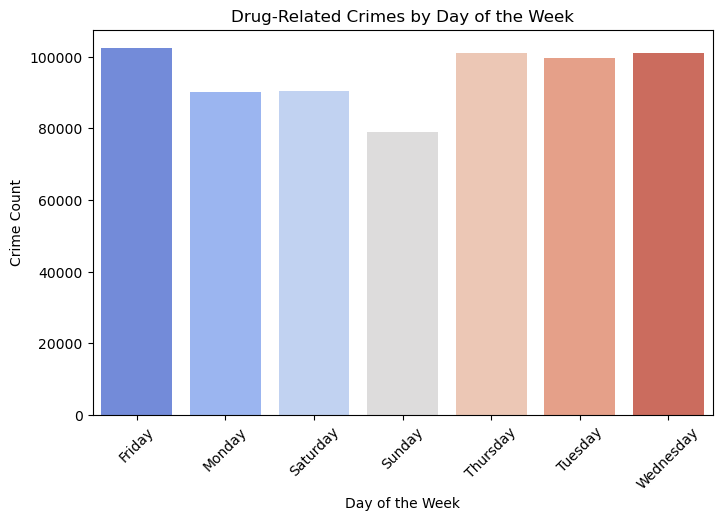

Chi-Square Test Results:
Chi-Square Statistic: 0.00
p-value: 1.0000
Degrees of Freedom: 0
요일에 따른 범죄 발생 차이는 없음.


In [85]:
# 마약 관련 범죄 유형 정의
drug_crime = ['NARCOTICS', 'OTHER NARCOTIC VIOLATION']

# 범죄 유형 필터링
df = df[df['Primary Type'].isin(drug_crime)]

# 요일별 범죄 발생 건수 계산
df['Day of Week'] = df['Date'].dt.day_name() # 요일 추출
crime_counts = df['Day of Week'].value_counts().sort_index()

# 요일별 마약 범죄 발생 빈도 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=crime_counts.index, y=crime_counts.values, hue=crime_counts.index, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.title("Drug-Related Crimes by Day of the Week")
plt.xticks(rotation=45)
plt.show()

# 카이제곱 검정 (요일별 발생 빈도 차이 검정)
observed = np.array(crime_counts)
expected = np.full_like(observed, observed.mean())  # 기대값 = 평균 발생 빈도

chi2, p, dof, expected_frequencies = chi2_contingency([observed])

# 결과 출력
print(f"Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# 결과 해석
if p < 0.05:
    print("요일에 따라 마약 관련 범죄 발생 빈도가 유의미하게 다름.")
else:
    print("요일에 따른 범죄 발생 차이는 없음.")

- 요일별 범죄 발생 빈도 데이터를 비교 (범주형 데이터)

- 카이제곱 검정을 통해 각 범주가 동일하게 분포하는지, 아니면 특정 범주에서 유의미한 차이가 있는지를 분석하기 위해 사용

- 귀무가설(H₀): 요일에 따라 마약 관련 범죄 발생 패턴은 차이가 없다.

- 대립가설(H₁): 요일에 따라 마약 관련 범죄 발생 패턴은 차이가 있다.

- 검정 결과: p-value = 1.0000 (유의수준 0.05보다 큼) → 대립가설 기각 →  귀무가설 채택  
→ 요일에 따라 마약 관련 범죄 발생 패턴은 차이가 없다 → 마약 범죄 발생은 모든 요일에서 동일한 빈도로 발생.